# Setup

In [ ]:
# install lightkurve library
!pip install lightkurve

In [ ]:
# import all the useful library for data analytics
import lightkurve as lk   # for handling lightcurve data
import numpy as np        # for mathematical functions

# Task 1 : Plotting and Analysis of noisy transit signals

## (A) Search and download all the light curve data of the star Kepler-17

In [ ]:
# searches all file with KIC ID = 10619192
pixelfile = lk.search_targetpixelfile("KIC 10619192")

# downloads all the 46 files
pixelfile.download_all()

## (B) Obtain the best-suited light curve and plot it

In [ ]:
# iterate through all 46 files 
for i in range(46):

  # search and download the pixelfile 
  pixelfile = search_targetpixelfile("KIC 10619192")[i].download()

  # convert the pixelfile to lightcurve by adding up all the flux values vs time
  lc = pixelfile.to_lightcurve(aperture_mask='all')

  # plot the lightcurve
  lc.normalize().plot()

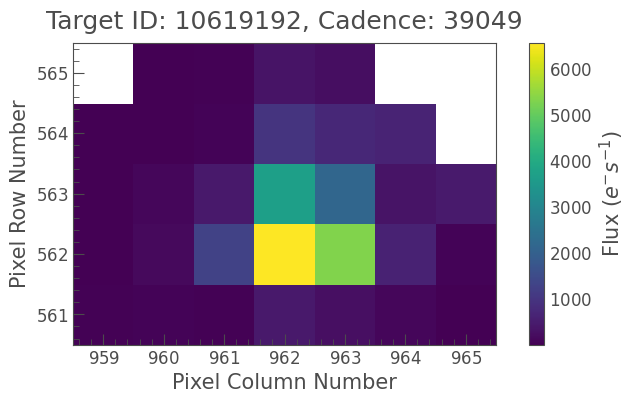

In [ ]:
# download the best curve
pixelfile = lk.search_targetpixelfile("KIC 10619192")[26].download()

# plot it
pixelfile.plot()

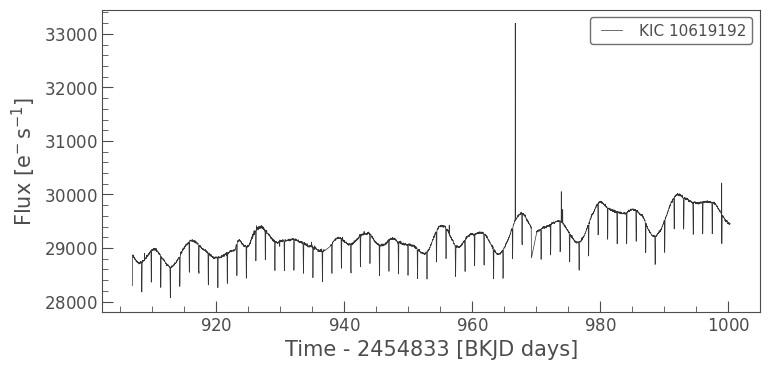

In [ ]:
lc = pixelfile.to_lightcurve(aperture_mask='all')
lc.plot()

## (C) Modify the above-plotted graph by normalizing it.

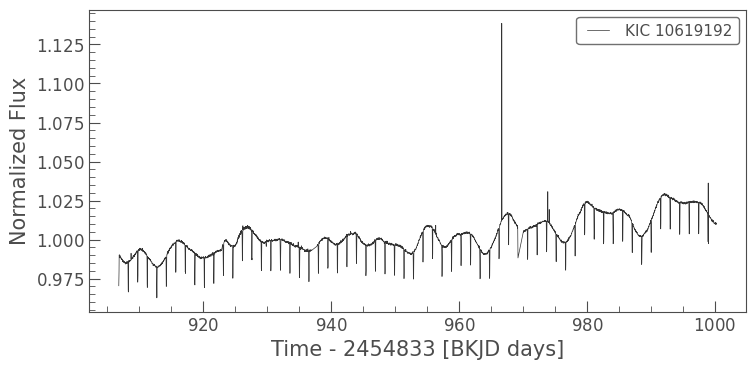

In [ ]:
# normalizes the lightcurve
lc_normalized = lc.normalize()

# plot the normalized curve
lc_normalized.plot()

## (D) estimate the following information about the light curve

In [ ]:
# 1. Mean of the flux
print("Mean : ", lc.flux.mean())

# 2. standard deviation of flux
print("Std : ", lc.flux.std())

# 3. CDPP metric
print("CDPP : ", lc.estimate_cdpp())

Mean :  29228.791015625 electron / s
Std :  345.2061767578125 electron / s
CDPP :  1034.8816119957833 ppm


# Task 2 : Transit Signal Detection and Analysis

We will do preprocessing to modify lightcurve 

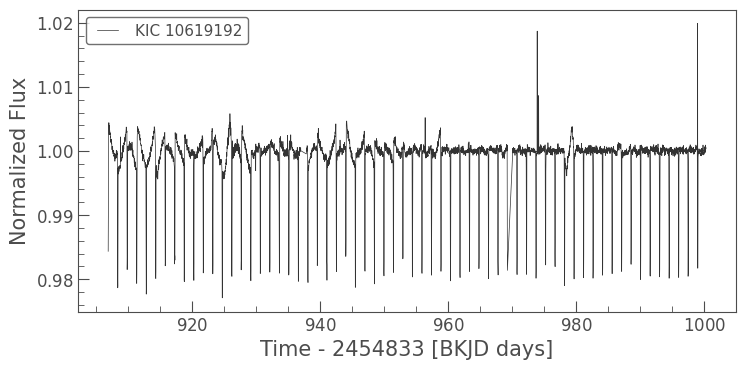

In [ ]:
lc = lc.remove_nans()
lc = lc.remove_outliers()
lc = lc.flatten()
lc = lc.normalize()
lc.plot()

## (A) Plot and show the Box Least Square (BLS) periodogram of the modified light curve 

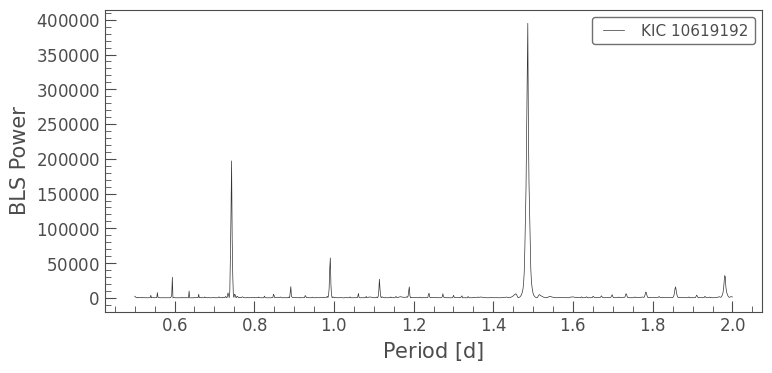

In [ ]:
# converts the lightcurve to periodogram and plots it
period = np.linspace(0.5, 2, 1000)
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=10000)
bls.plot()

## (B) Using this BLS periodogram, find the following parameters

In [ ]:
# box least square plot gives 3 values at maximum power 
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

# 1. Transit duration
print("Transit duration : ", planet_b_t0)

# 2. Time period of revolution
print("Time period of revolution : ", planet_b_period)

Transit duration :  908.3103621583249
Time period of revolution :  1.4864864864864864 d


## (C) Verify the transit by phase folding the modified light curve at the transit time and plot it.


(-0.5, 0.5)

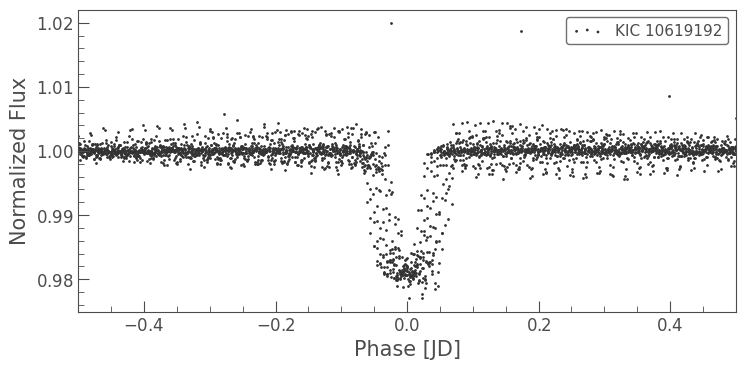

In [ ]:
# fold the lightcurve plot at time = tranit time
ax = lc.fold(period = planet_b_period, epoch_time = planet_b_t0).scatter()

# zooms in
ax.set_xlim(-0.5, 0.5)

## (D) Make a model curve of the transit by plotting a best-fit curve through the folded data points


In [ ]:
# Creates a BLS model using the BLS parameters
planet_b_model = bls.get_transit_model(period = planet_b_period, transit_time = planet_b_t0, duration = planet_b_dur)

(-0.5, 0.5)

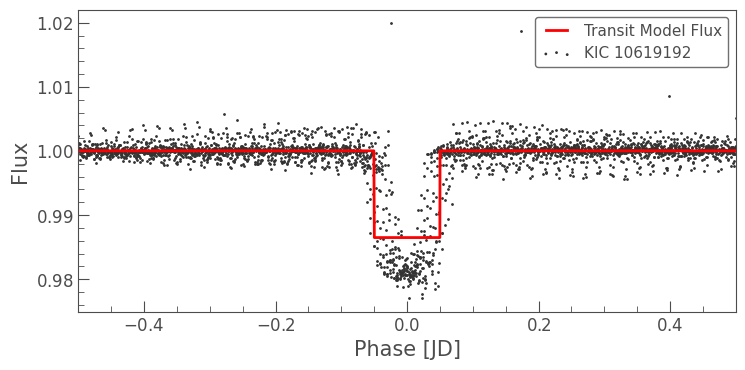

In [ ]:
# we will combine this folded plot
ax = lc.fold(planet_b_period, planet_b_t0).scatter()

# and will fit the best-fit curve through folded points
planet_b_model.fold(planet_b_period, planet_b_t0).plot(ax=ax, c='r', lw=2)

# zooming at dip location
ax.set_xlim(-0.5, 0.5)

## (E) estimate the relative flux dip (ΔF/F) 

F is the base flux of the star <br/>
ΔF is the change in flux during transit

Approach :

In [ ]:
# gives the index of dip
planet_b_model.fold(planet_b_period, planet_b_t0).flux.argmin()

2087

In [ ]:
# We will get the values of F and f by planet_b_model
F = planet_b_model.fold(planet_b_period, planet_b_t0).flux[0]
f = planet_b_model.fold(planet_b_period, planet_b_t0).flux[2087]
d = F - f
print('Relative Flux Dip : ',d/F)

Relative Flux Dip :  0.013538693326761216


# Task 3 : Estimation of Stellar Parameters using Asteroseismology

/usr/local/lib/python3.7/dist-packages/lightkurve/search.py:352: LightkurveWarning: Warning: 3 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning,
/usr/local/lib/python3.7/dist-packages/lightkurve/search.py:352: LightkurveWarning: Warning: 3 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning,
/usr/local/lib/python3.7/dist-packages/lightkurve/search.py:352: LightkurveWarning: Warning: 3 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning,


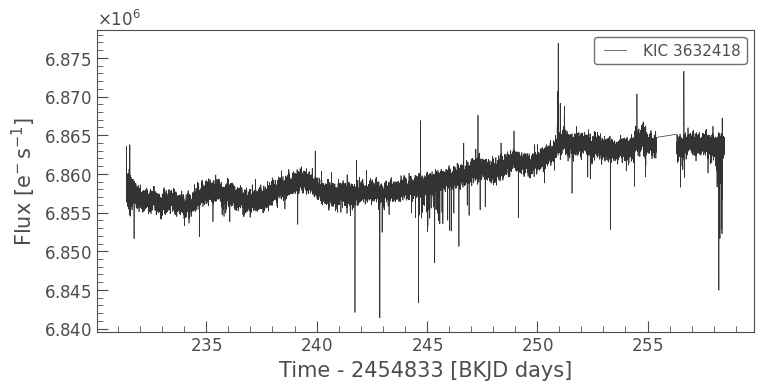

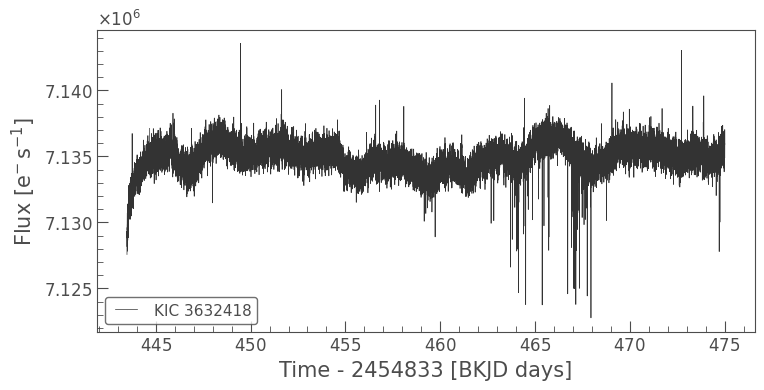

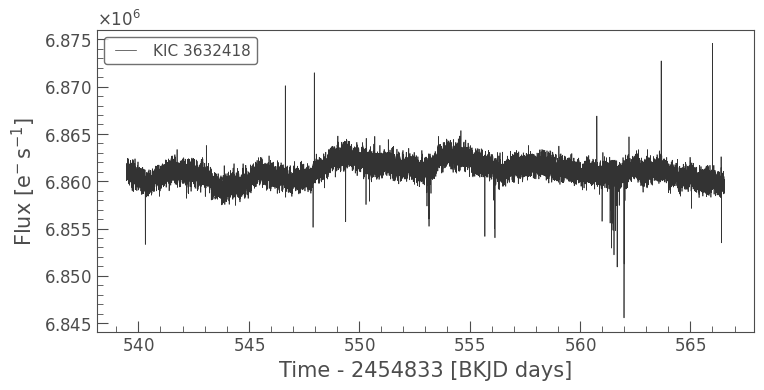

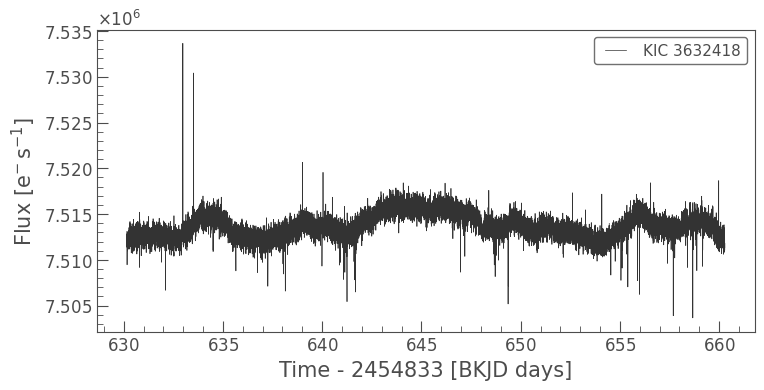

In [ ]:
# iterates through all quarters
for i in [2,5,6,7]:

  # searches for files with KIC = 3632418 and short cadences
  search_result = lk.search_lightcurve('KIC 3632418',
                                       cadence='short',
                                       author='Kepler',
                                       quarter=i)
  
  # downloads the files as lightcurves
  lc = search_result.download()

  # plots the lightcurves
  lc.plot()

In [ ]:
# searches all the files whose KIC=3632418 with short cadences and quarter = 2,5,6,7
search_result = lk.search_lightcurve("KIC 3632418",
                                     cadence='short',
                                     author='Kepler',
                                     quarter=(2,5,6,7))

# downloads all the files and stitches them into one lightcurve
lc = search_result.download_all().stitch()

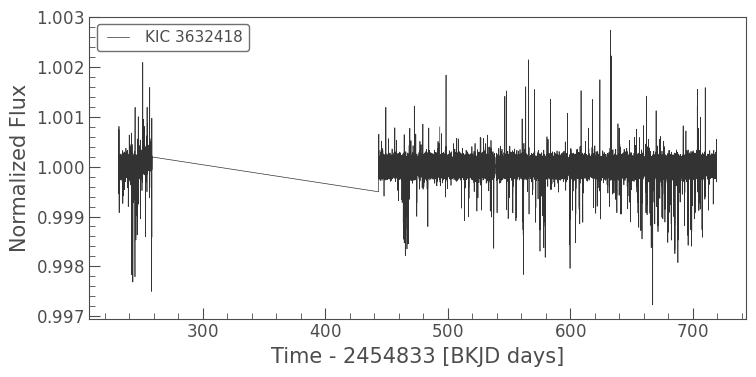

In [ ]:
# normalizes the lightcurve
lc = lc.normalize()

# removes the long term trends using savitzky golay filter
lc = lc.flatten()

# plot the modified plot
lc.plot()

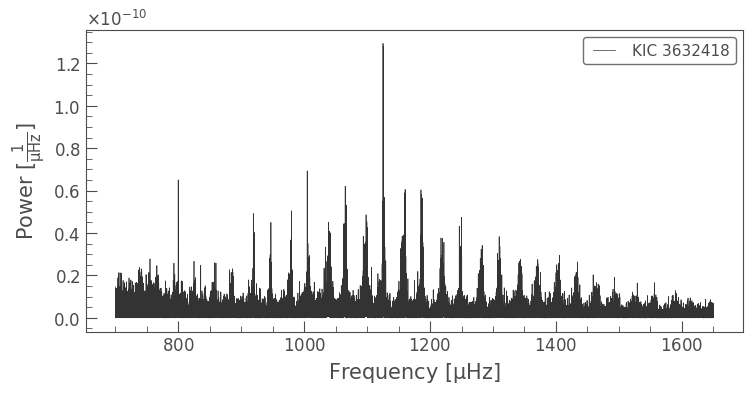

In [ ]:
# convert the modified lightcurve to periodogram
pg = lc.to_periodogram(normalization='psd',
                       minimum_frequency=700,
                       maximum_frequency=1650)

# plots the periodogram
ax = pg.plot()

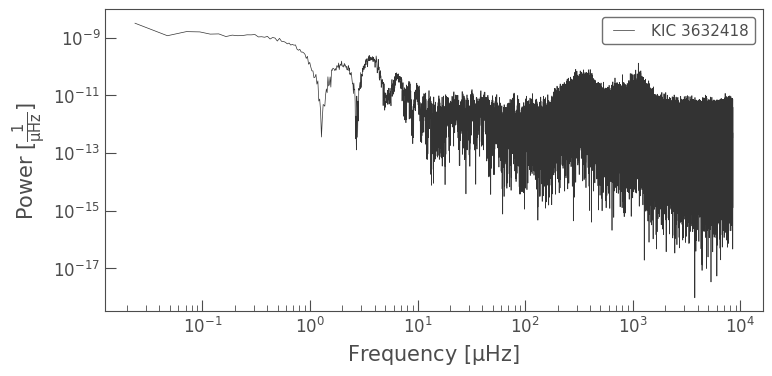

In [ ]:
# plots the periodogram
pg = lc.to_periodogram(normalization='psd')
ax = pg.plot(scale='log')

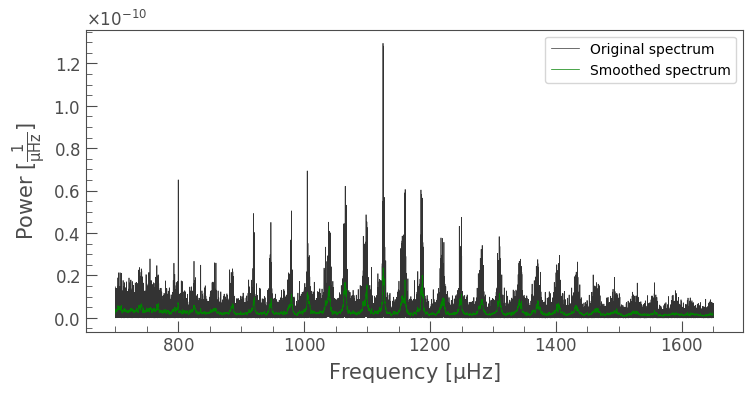

In [ ]:
# Plot a smoothed version of the power spectrum on top in green
ax = pg.plot(label='Original spectrum')
pg.smooth(filter_width=1).plot(ax=ax,
                               color='green',
                               label='Smoothed spectrum')

# plot the combined graphs
ax.legend()

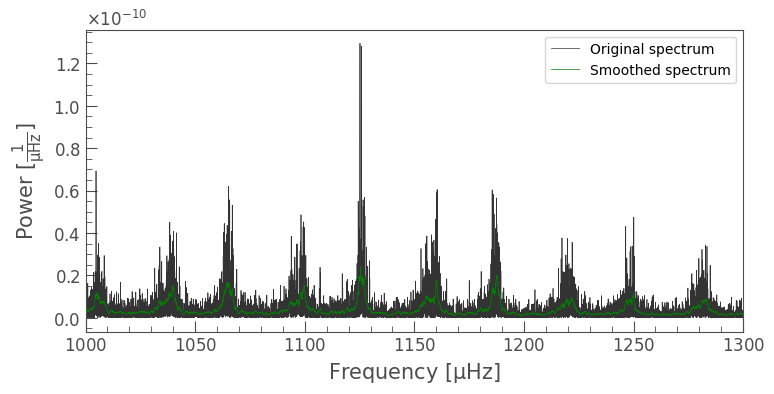

In [ ]:
# Plot a smoothed version of the power spectrum on top in green
ax = pg.plot(label='Original spectrum')
pg.smooth(filter_width=1).plot(ax=ax,
                               color='green',
                               label='Smoothed spectrum')

# zoomes around the max power range 
ax.set_xlim(1000, 1300)

# plot the combined graphs
ax.legend()

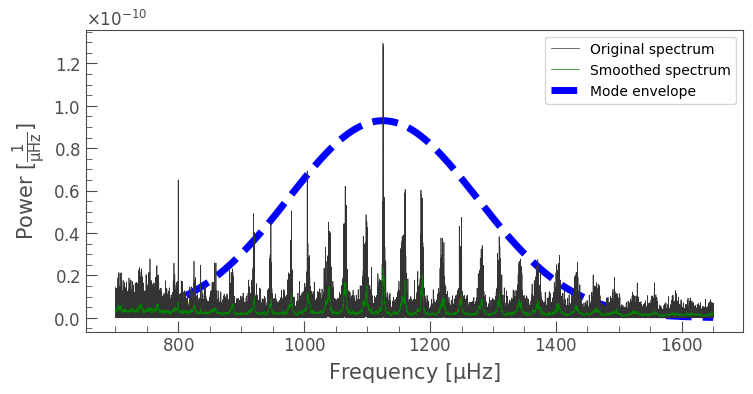

In [ ]:
# Plot a smoothed version of the power spectrum on top in green
ax = pg.plot(label='Original spectrum')
pg.smooth(filter_width=1).plot(ax=ax,
                               color='green',
                               label='Smoothed spectrum')

# Highlight the "mode envelope" using a Gaussian curve
f = pg.frequency.value
ax.plot(f, 9.3e-11*np.exp(-(f-1125)**2/(2*150**2)),
        lw=5, ls='--', zorder=0,
        color='blue', label='Mode envelope');

ax.legend()

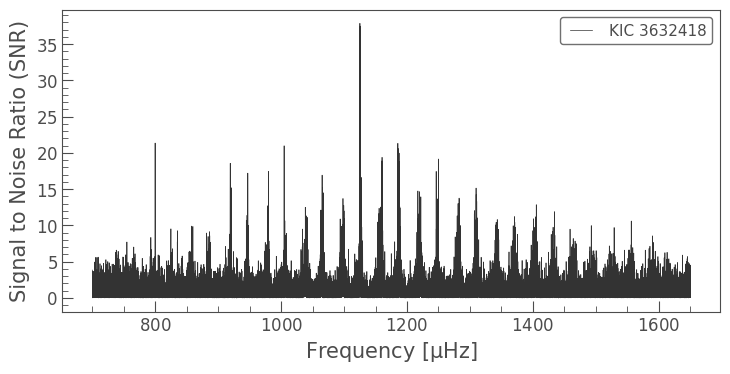

In [ ]:
# converts periodogram into signal to noise ratio
snr = pg.flatten()

# signal to noise ratio vs frequency plot
ax = snr.plot()

In [ ]:
# create seiosomlogic object from the signal to noise ratio plot
seismology = snr.to_seismology()

In [ ]:
# estimates numax 
seismology.estimate_numax()

numax: 1165.00 uHz (method: ACF2D)

In [ ]:
print("numax : ",seismology.numax.value)

numax :  1165.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a03025790>,
      dtype=object)

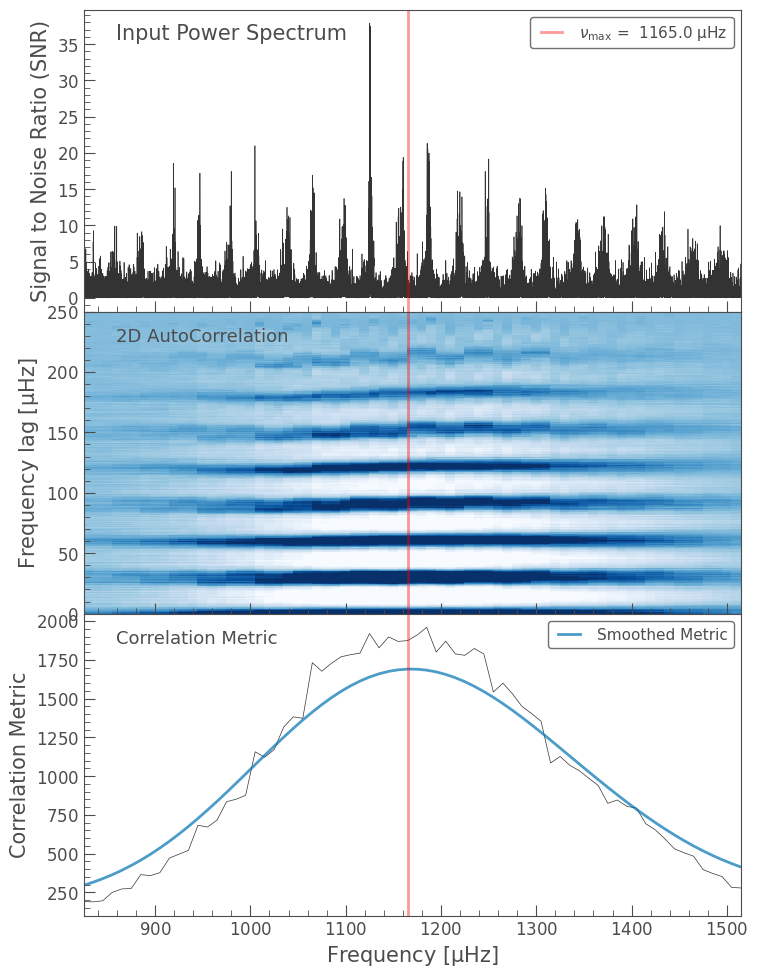

In [ ]:
seismology.diagnose_numax()

In [ ]:
seismology.estimate_deltanu()

deltanu: 60.72 uHz (method: ACF2D)

In [ ]:
print("deltanu : ", seismology.deltanu.value)

deltanu :  60.72104606250446


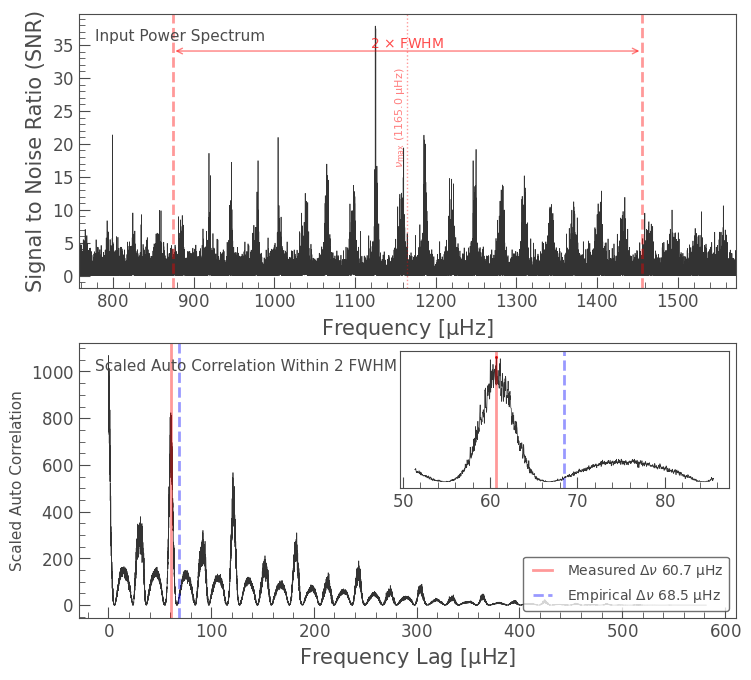

In [ ]:
seismology.diagnose_deltanu()

In [ ]:
print("Mass : ", seismology.estimate_mass())
print("Radius : ", seismology.estimate_radius())

Mass :  1.4627661924732827 solMass
Radius :  1.9346498514008708 solRad
